In [4]:
# import kagglehub
# path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")
# print("Path to dataset files:", path)

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Nosso objetivo neste projeto, de modo geral, é prever o salário (`Salary`) de um funcionário com base no seu tempo de trabalho (`YearsExperience`).

Inicialmente vamos ler e entender o dataset e entender um pouco melhor as features. Note como o plot do gráfico de pontos parece perfeito para um algoritmo de regressão linear.

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0 


<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None 


       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000      

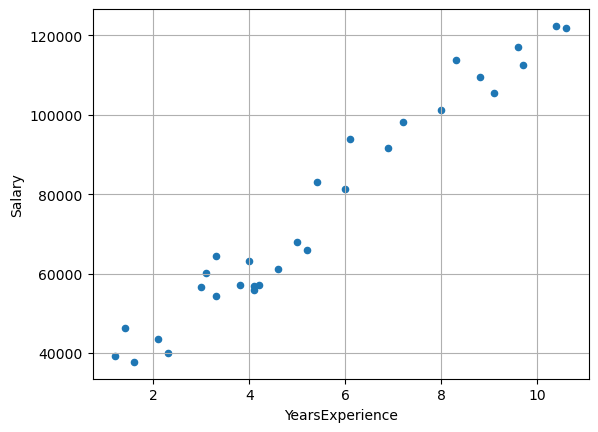

In [6]:
salary = pd.read_csv("Salary_dataset.csv")

print(salary.head(), "\n\n")
print(salary.info(), "\n\n")
print(salary.describe(), "\n\n")

salary.plot(kind="scatter", x="YearsExperience", y="Salary", grid=True)
plt.show()

Inicialmente, precisamos separar o dataset em dois:
1. Inputs (`YearsExperience`) nossa entrada para predizer uma saída para o modelo. 
2. Outputs (`Salary`) a saída-alvo esperada pelo modelo. 

In [7]:
train_set, test_set = train_test_split(salary, test_size=0.2, random_state=42)

X_train_set, y_train_set = train_set['YearsExperience'], train_set['Salary']
X_test_set, y_test_set = test_set['YearsExperience'], test_set['Salary']

print(train_set.head())

    Unnamed: 0  YearsExperience    Salary
28          28             10.4  122392.0
24          24              8.8  109432.0
12          12              4.1   56958.0
0            0              1.2   39344.0
4            4              2.3   39892.0


Avançando, note que o salário tem uma variância muito alta de $40.000 \sim 120.000$, enquanto os anos de experiência tem uma variância de $1 \sim 10$.   

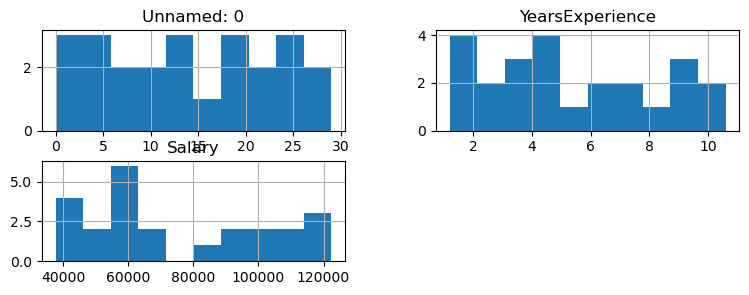

In [8]:
train_set.hist(bins=10, figsize=(9,3))
plt.show()

Vamos usar um tipo de normalização conhecida como padronização. Antes, precisamos "transformar" nossos dados de treinamento. O `StandardScaler()` espera receber uma matriz 2D, no entanto, nosso `X_train_set` e `X_test_set` são veteres 1D do Pandas. 

Portanto, primeiro vamos extrair os valores numéricos da `Série (.values)`, transformando-os em um array com o `.reshape(-1,1)`. 

In [9]:
std_scaler = StandardScaler()

X_train = X_train_set.values.reshape(-1,1)
X_test = X_test_set.values.reshape(-1,1)

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test) 

O que a padronização está fazendo é pegar a média e considera-la como $0$. Portanto, valores acima da média $x > std$ são padronizados para valores positivos maiores que $0$, e.g., 1. Enquanto valores menores que a média $x < std$, são padronizados para números negativos próximos menores que $0$, e.g., -1.

In [10]:
print("Mean: ", X_train.mean())
for i in range(5): 
    print(X_train[i], "->", X_train_scaled[i])

Mean:  5.2875000000000005
[10.4] -> [1.77445774]
[8.8] -> [1.21912622]
[4.1] -> [-0.41216011]
[1.2] -> [-1.41869849]
[2.3] -> [-1.03690807]


### Scikit-Learn

Usando a biblioteca Scikit-Learn

Agora basta aplicar nosso modelo de regressão linear para resolver este problema. Vamos usar a classe `LinearRegression` da biblioteca do Scikit-Learn.

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_set)
y_prev = lin_reg.predict(X_test_scaled)

weight = lin_reg.coef_
print(f"Coeficiente de peso (w): {weight[0]}")

bias = lin_reg.intercept_
print(f"Bias (b): {bias}")

Coeficiente de peso (w): 27151.537425833674
Bias (b): 74208.625


Agora podemos conferir a "linha" que a regressão linear encontrou. Na prática, o que ela encontrou são os coeficientes da função linear $f(x) = ax+b$ que relacionam uma entrada $x$ (`YearsExperience`) com uma saída $f(x) = y$ (`Salary`). 

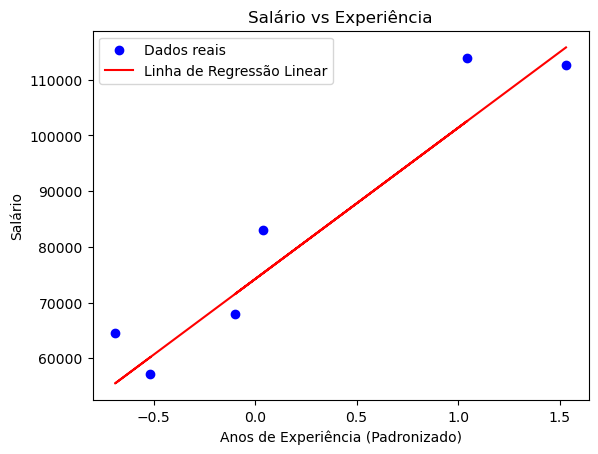

In [12]:
plt.scatter(X_test_scaled, y_test_set, color="blue", label="Dados reais")
plt.plot(X_test_scaled, y_prev, color='red', label='Linha de Regressão Linear')
plt.title('Salário vs Experiência')
plt.xlabel('Anos de Experiência (Padronizado)')
plt.ylabel('Salário')
plt.legend()
plt.show()

Agora podemos usar os pesos encontrados pelo nosso modelo para prever possíveis salários com base nos anos de experiência. 

Seu salário com base no seu tempo de experiência (5.0 anos) é de: 71499.2780946286


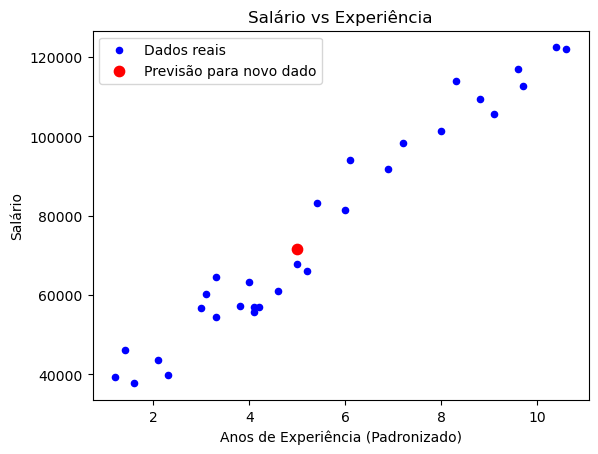

In [13]:
a = weight[0]
b = bias 

affine_function = lambda x: a*x + b 

#x = float(input("Entre com o seu tempo de experiência (em anos):"))
x = 5.0
x_scaled = std_scaler.transform([[x]])
y = affine_function(x_scaled[0][0])
print(f"Seu salário com base no seu tempo de experiência ({x} anos) é de: {y}")

salary.plot(kind='scatter', x='YearsExperience', y='Salary', color='blue', label='Dados reais')
plt.scatter(x, y, color='red', s=55, label='Previsão para novo dado')
plt.title('Salário vs Experiência')
plt.xlabel('Anos de Experiência (Padronizado)')
plt.ylabel('Salário')
plt.legend()
plt.show()

### TensorFlow/Keras

Usando TensorFlow/Keras

A fim de curiosidade, a versão usando tensorflow (keras) é dada a seguir. Usamos a classe `Sequential([])` para criar o modelo, criando uma única camada `layers.Dense`, passando `units=1` (uma única saída, i.e., `Salary`) e `input_shape=[1]` (uma única entrada, i.e., `YearsExperience`).

Na compilação, o algoritmo que ajustas os pesos (optimizer) foi usado o SGD puro e para a loss foi usado o erro quadrático médio. Foi usado um learning rate de $0.1$ e $100$ épocas de treinamento. 

In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')

model.summary()  

/home/launzoa/.local/share/mamba/envs/venv_TensorflowAndKeras/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Por fim, o `history` é quem vai receber o "histórico de treinamento", permitindo que a gente consiga ver o gráfico da loss do modelo em relação ao número de épocas.

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 6271270912.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4023369728.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2584713472.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1663973760.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1074699776.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 697564608.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 456198144.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 301723680.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 202859904.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 139587200.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 99092648.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 73176120.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 56589500.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26m

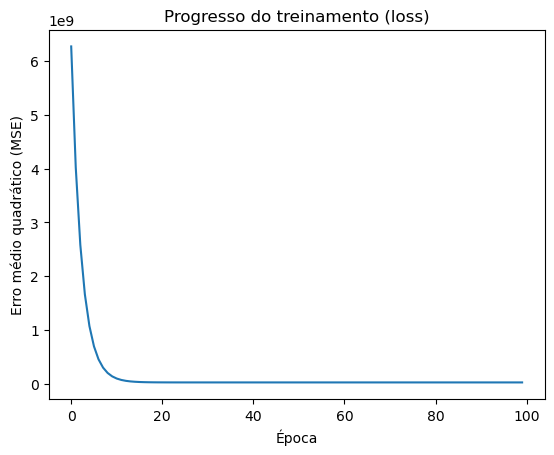

In [15]:
history = model.fit(X_train_scaled, y_train_set, epochs=100, verbose=1)
plt.plot(history.history['loss'])
plt.title("Progresso do treinamento (loss)")
plt.xlabel("Época")
plt.ylabel("Erro médio quadrático (MSE)")
plt.show()


Os pesos que o modelo encontrou ($w$ e $b$) são próximos do encontrado pelo Scikit-Learn (que usa uma equação de mínimos quadrados).

In [16]:
weight_tf, bias_tf = model.layers[0].get_weights()
print(f"Peso pelo tf (w): {weight_tf[0,0]}")
print(f"Bias pelo tf (b): {bias_tf[0]}")

Peso pelo tf (w): 27151.533203125
Bias pelo tf (b): 74208.609375


O gráfico final que mostra como a linha de regressão aparece para este problema.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


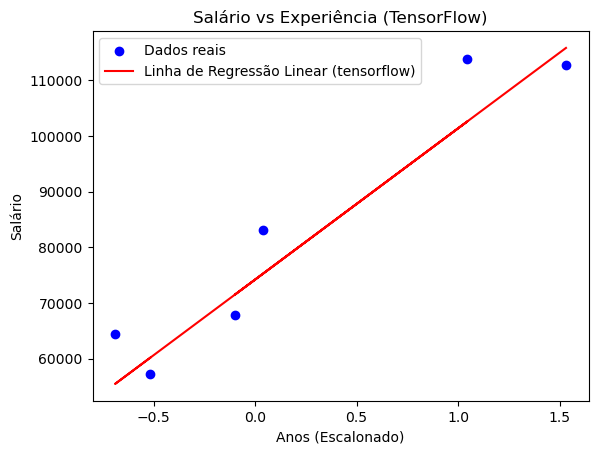

In [17]:
y_pred_tf = model.predict(X_test_scaled)

plt.scatter(X_test_scaled, y_test_set, color='blue', label='Dados reais')
plt.plot(X_test_scaled, y_pred_tf, color='red', label='Linha de Regressão Linear (tensorflow)')
plt.title('Salário vs Experiência (TensorFlow)')
plt.xlabel('Anos (Escalonado)')
plt.ylabel('Salário')
plt.legend()
plt.show()